In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "avg.exp.tsv"

In [106]:
df = pd.read_csv(file,sep="\t")

In [202]:
df.head()

,Ery_mNFIXko,Ery_mWT,CMP_mNFIXko,CMP_mWT,ST-HSC.1_mNFIXko,ST-HSC.1_mWT,LT-HSC.1_mNFIXko,LT-HSC.1_mWT,GMP_mNFIXko,GMP_mWT,...,ERP_mNFIXko,ERP_mWT,LT-HSC.2_mNFIXko,LT-HSC.2_mWT,MEP_mNFIXko,MEP_mWT,ST-HSC.2_mNFIXko,ST-HSC.2_mWT,MPP_mNFIXko,MPP_mWT
Xkr4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.005663,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_columns = ['a', 'b', 'a', 'a_2', 'a_2', 'a', 'a_2', 'a_2_2']

def uniquify(df_columns):
    seen = set()

    for item in df_columns:
        fudge = 1
        newitem = item

        while newitem in seen:
            fudge += 1
            newitem = "{}_{}".format(item, fudge)

        yield newitem
        seen.add(newitem)

list(uniquify(df_columns))

['a', 'b', 'a_2', 'a_2_2', 'a_2_3', 'a_3', 'a_2_4', 'a_2_2_2']

In [40]:
df_columns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


['a', 'b', 'a', 'a_2', 'a_2', 'a', 'a_2', 'a_2_2']

# get all deg

In [3]:
deg = pd.read_csv("all_combined_DEG.tsv",sep="\t")
deg.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
0,5.756060e-81,0.847197,0.346,0.005,1.787429e-76,6.907272e-79,LT-HSC.1,Trim12a,76681.0,UP,LT-HSC.1
1,5.791799e-64,-1.119813,0.008,0.442,1.798527e-59,3.475079e-62,LT-HSC.1,Echdc2,52430.0,DN,LT-HSC.1
2,8.276152e-55,0.526138,1.000,1.000,2.569993e-50,3.310461e-53,LT-HSC.1,Gm42418,NaN,UP,LT-HSC.1
3,4.344522e-39,-0.310458,1.000,1.000,1.349104e-34,1.303356e-37,LT-HSC.1,Rpl35a,57808.0,DN,LT-HSC.1
4,1.984737e-32,-0.239128,1.000,1.000,6.163204e-28,4.763369e-31,LT-HSC.1,Rps29,20090.0,DN,LT-HSC.1


In [4]:
deg.geneName.nunique()

530

In [7]:
deg.geneName.unique().tolist()

['Trim12a',
 'Echdc2',
 'Gm42418',
 'Rpl35a',
 'Rps29',
 'Rps15a',
 'Rpl28',
 'Rpl32',
 'Rpl37a',
 'Rplp1',
 'Rpl41',
 'Rpl39',
 'Rps12',
 'Rps20',
 'Trim34a',
 'Rps26',
 'Rpl34',
 'Rps25',
 'Fau',
 'Rpl36',
 'Rpl37',
 'Rps28',
 'Rpl38',
 'Wdfy1',
 'H2-Q7',
 'Rpl22l1',
 'Gstp1',
 'Gm47283',
 'Lmo2',
 'Tspan32',
 'H2-Eb1',
 'Ndrg1',
 'Cox6b1',
 'Maf',
 'H2-Q4',
 'Arhgdib',
 'Fads1',
 'Apoe',
 'Gdpd3',
 'Tnfsf10',
 'Jund',
 'S100a11',
 'Adipor2',
 'E230032D23Rik',
 'Smim5',
 'Rbm3',
 'Lgals1',
 'Psmb8',
 'Gnb4',
 'Mettl7a1',
 'Rsrp1',
 'Tmed5',
 'Ankrd12',
 'H2-Q6',
 'Sem1',
 'Wnk1',
 'Sh3bgrl3',
 'Akap13',
 'Tap1',
 'Meg3',
 'Clec2d',
 'Gse1',
 'Stat3',
 'Snrpe',
 'Cyp51',
 'Atp5e',
 'Mrpl54',
 'Mpl',
 'Cox7a2',
 'Snrpf',
 'Numa1',
 'Ctsg',
 'Angpt1',
 'Atp1a1',
 'Aplp2',
 'Glg1',
 'Rras',
 'Tsc22d3',
 'Insig1',
 'Arid1b',
 'Tagln2',
 'Cox6c',
 'Rb1cc1',
 'Ncor1',
 'Uqcrb',
 'Stat1',
 'Prtn3',
 'Hlf',
 'Ly6a',
 'Scd2',
 'Nop10',
 'Rfk',
 'Vgll4',
 'Gclm',
 'Eif4b',
 'Prr13',
 'Uqcc2',
 

In [ ]:
deg

# get logFC for each gene

In [152]:
np.mean([1,2])

1.5

In [4]:
import numpy as np
def logFC(r):
    # r = r+0.1
    out = []
    for i in ["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]:
        KO = f"{i}_mNFIXko"
        WT = f"{i}_mWT"
        if np.mean([r[KO],r[WT]])<0.5:
            out.append(0)
            continue
        if r[WT]<=0.1:
            out.append(0)
        else:
            out.append(np.log2(r[KO]/r[WT]))
    return pd.Series(out)
out = df.apply(logFC,axis=1)

NameError: name 'df' is not defined

In [154]:
out = pd.DataFrame(out)

In [155]:
out.columns = ["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]

In [156]:
out.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
out = out[out.abs().max(axis=1)>0.1]

In [159]:
out.shape

(4106, 11)

In [160]:
out.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Mrpl15,-0.040023,-0.033108,0.007163,-0.143527,0.398147,-0.124810,0.117412,-0.209451,0.161803,-0.000824,0.029826
Tcea1,-0.107510,0.191444,0.102417,0.258030,0.277239,-0.090642,0.087729,-0.034719,0.096150,-0.059883,0.040829
Rb1cc1,0.337471,0.285117,0.152039,0.001025,0.119216,0.180678,0.113362,-0.033154,-0.064525,0.404253,0.027002
Pcmtd1,0.286926,-0.164511,0.049505,0.335579,0.069253,0.000000,0.000000,0.150508,0.000000,0.000000,0.000000
Rrs1,0.000000,-0.036834,0.000000,0.000000,0.000000,-0.025413,0.053266,0.061834,0.215997,-0.013011,0.073976


In [162]:
out.shape

(4106, 11)

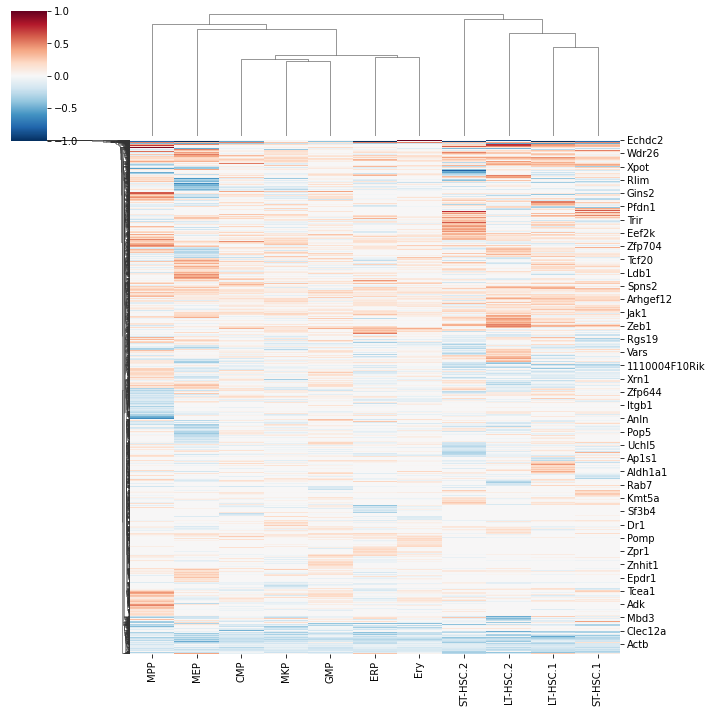

In [165]:
sns.clustermap(out,vmin=-1,vmax=1,cmap="RdBu_r")

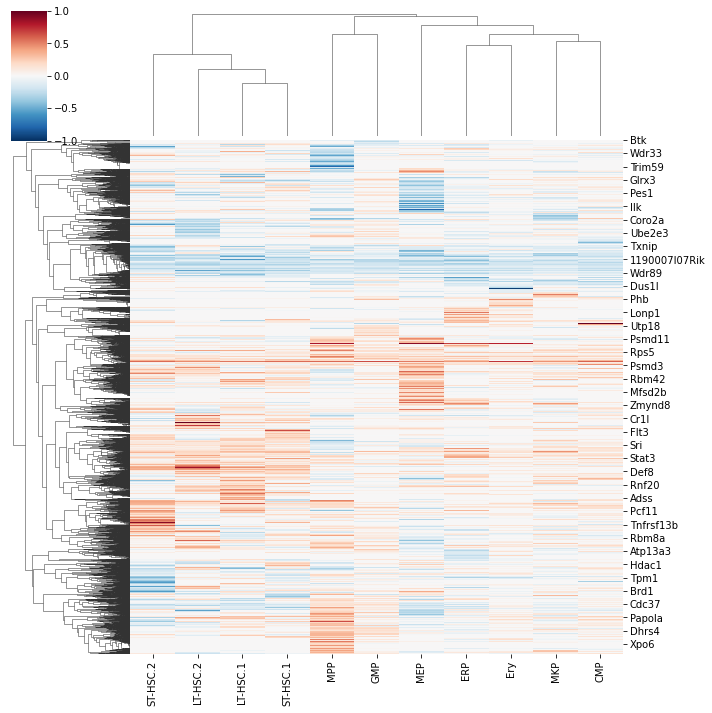

In [166]:
sns.clustermap(out,vmin=-1,vmax=1,cmap="RdBu_r",metric="cosine")

In [167]:
out.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Mrpl15,-0.040023,-0.033108,0.007163,-0.143527,0.398147,-0.124810,0.117412,-0.209451,0.161803,-0.000824,0.029826
Tcea1,-0.107510,0.191444,0.102417,0.258030,0.277239,-0.090642,0.087729,-0.034719,0.096150,-0.059883,0.040829
Rb1cc1,0.337471,0.285117,0.152039,0.001025,0.119216,0.180678,0.113362,-0.033154,-0.064525,0.404253,0.027002
Pcmtd1,0.286926,-0.164511,0.049505,0.335579,0.069253,0.000000,0.000000,0.150508,0.000000,0.000000,0.000000
Rrs1,0.000000,-0.036834,0.000000,0.000000,0.000000,-0.025413,0.053266,0.061834,0.215997,-0.013011,0.073976


In [170]:
all_deg.shape

(440, 11)

In [171]:
all_deg.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
1,5.756060e-81,0.847197,0.346,0.005,1.787429e-76,6.907272e-79,LT-HSC.1,Trim12a,76681.0,UP,LT-HSC.1
2,5.791799e-64,-1.119813,0.008,0.442,1.798527e-59,3.475079e-62,LT-HSC.1,Echdc2,52430.0,DN,LT-HSC.1
3,8.276152e-55,0.526138,1.000,1.000,2.569993e-50,3.310461e-53,LT-HSC.1,Gm42418,NaN,UP,LT-HSC.1
4,4.344522e-39,-0.310458,1.000,1.000,1.349104e-34,1.303356e-37,LT-HSC.1,Rpl35a,57808.0,DN,LT-HSC.1
5,5.918950e-30,-0.262963,1.000,1.000,1.838012e-25,1.183790e-28,LT-HSC.1,Rps15a,267019.0,DN,LT-HSC.1


In [180]:
overlaps = list(set(all_deg.geneName.unique()).intersection(out.index))
out2 = out.loc[overlaps]

In [174]:
out2.shape

(212, 11)

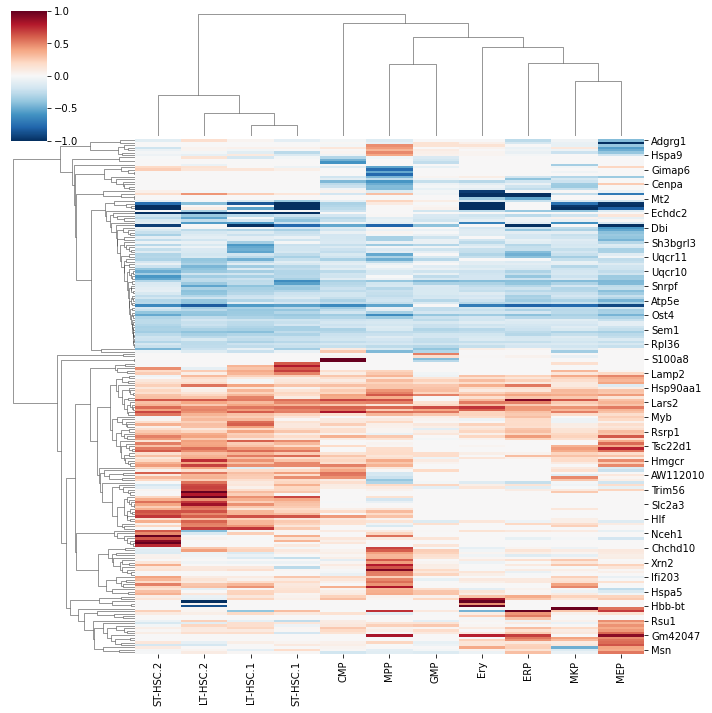

In [181]:
sns.clustermap(out2,vmin=-1,vmax=1,cmap="RdBu_r",metric="cosine")

In [204]:
def hamming_distance(s1, s2):
	return sum(ch1 != ch2 for ch1,ch2 in zip(s1,s2))

In [226]:
import distance

In [207]:
!pip install Distance

  Using cached Distance-0.1.3.tar.gz (180 kB)
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=d25b3d0f8fe106755be6f6c2b0d1467a87c439ad95e440567b5385d1d2c3d711
  Stored in directory: /research/rgs01/home/clusterHome/yli11/.cache/pip/wheels/fb/a8/64/6edcab63ec51512a87cacf9b3563c711ad6b7b05d61b704493
Successfully built Distance


In [228]:
%timeit distance.hamming("hamming", "hamning")

1.17 µs ± 4.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [211]:
%timeit hamming_distance("hamming", "hamning")

1.02 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [230]:
from Levenshtein import distance,hamming

In [232]:
%timeit distance(str(random.random())[:10], str(random.random())[:10])

1.66 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [231]:
%timeit hamming(str(random.random())[:10], str(random.random())[:10])

1.55 µs ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [221]:
%timeit hamming_distance(str(random.random()), str(random.random()))

3.34 µs ± 13.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [227]:
%timeit distance.hamming(str(random.random()), str(random.random()))

ValueError: expected two strings of the same length

In [214]:
import uuid

In [216]:
import random

'0.16485935900092552'

In [182]:
out2 = out2.drop(['MPP'],axis=1)

In [188]:
out2.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MKP,CMP,MEP,GMP,ERP,Ery
Hspa5,0.219197,0.001158,0.163232,0.300553,-0.052890,0.067026,-0.148024,0.276791,0.022410,0.145612
Clec2d,0.381199,0.251407,0.690772,0.193954,0.333147,0.164202,0.019486,0.000000,0.000000,0.000000
Fam96a,0.169408,0.217915,-0.048823,-0.025203,0.011951,0.116082,0.450004,0.268615,0.011641,0.021573
Slpi,0.000000,0.000000,0.000000,0.000000,0.000000,-0.474190,0.000000,-0.193874,0.000000,0.000000
Gnl3,-0.145499,-0.054720,0.055823,-0.134516,0.030623,0.064501,0.091919,0.227501,0.067144,0.028067


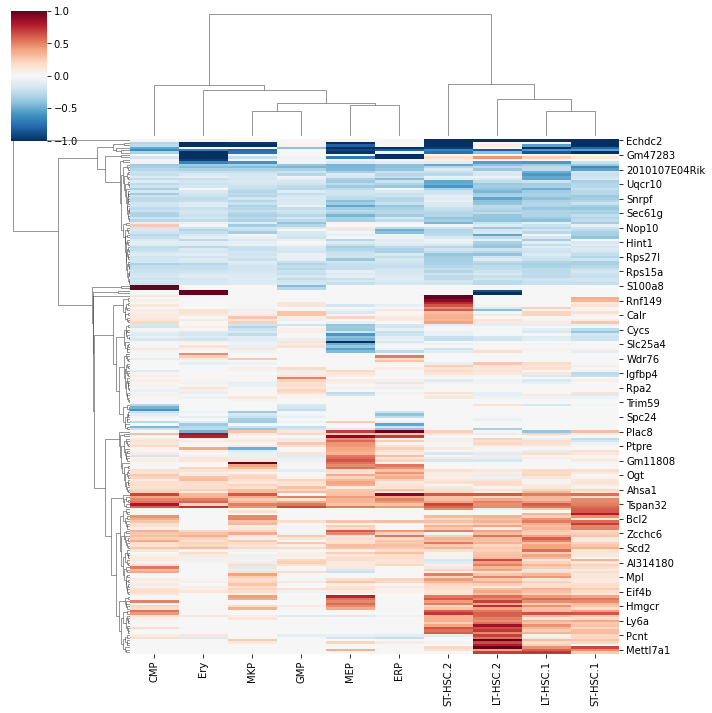

In [189]:
sns.clustermap(out2,vmin=-1,vmax=1,cmap="RdBu_r",metric="euclidean",method="ward")

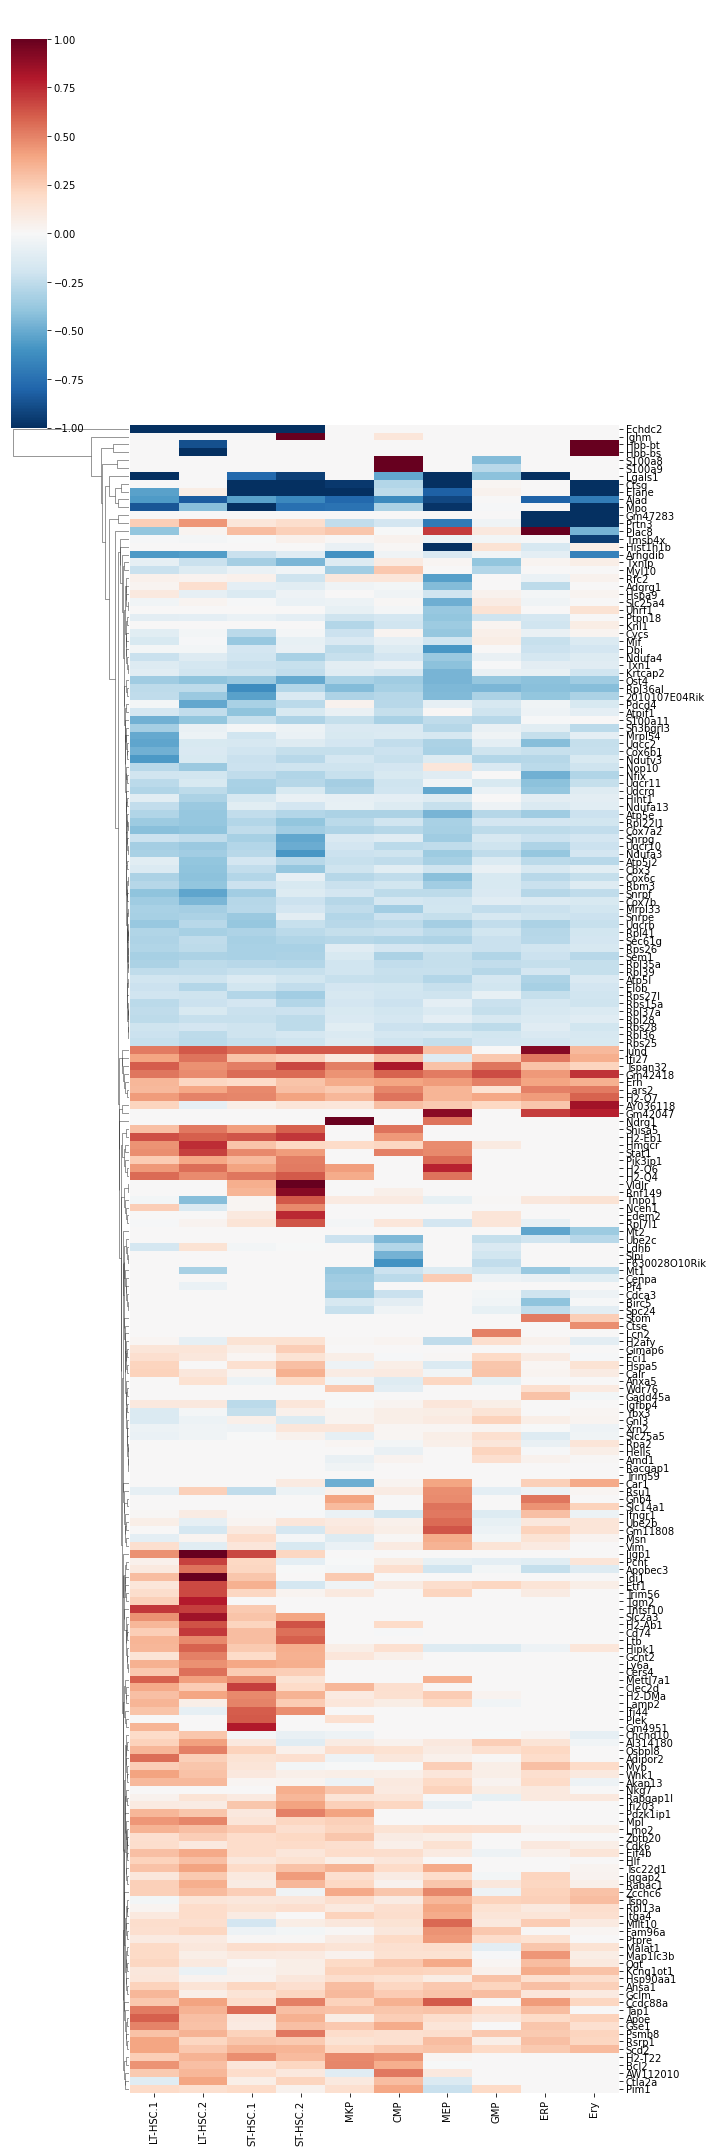

In [200]:
sns.clustermap(out2,vmin=-1,vmax=1,cmap="RdBu_r",metric="euclidean",method="average",col_cluster=False,figsize=(10,30),yticklabels=True)
plt.savefig("DEG_heatmap.pdf",bbox_inches='tight')


In [201]:
out2.shape

(212, 10)

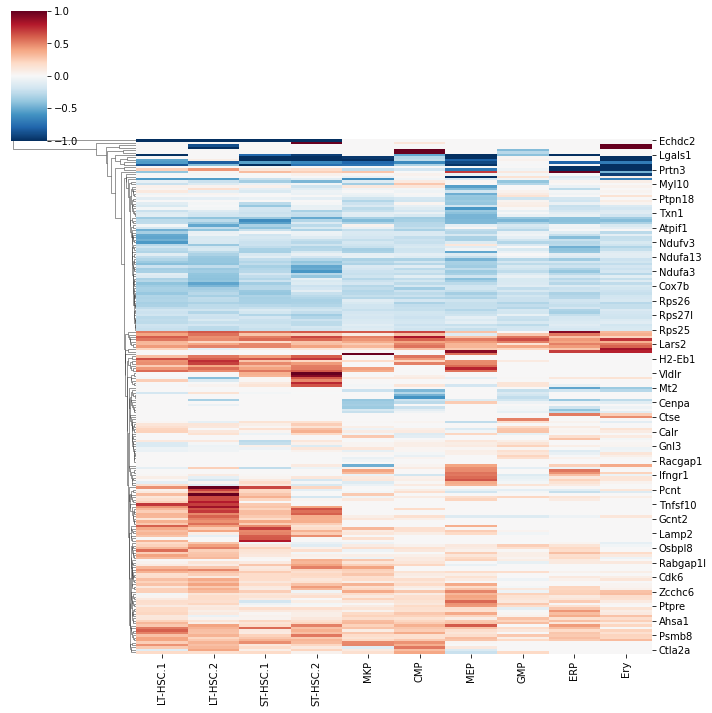

In [239]:
sns.clustermap(out2,vmin=-1,vmax=1,cmap="RdBu_r",metric="euclidean",method="average",col_cluster=False,figsize=(10,10))
plt.savefig("DEG_heatmap.small.pdf",bbox_inches='tight')


In [147]:
out.loc['Cd74']

LT-HSC.1    0.245000
LT-HSC.2    0.706726
ST-HSC.1    0.304954
ST-HSC.2    0.548250
MPP        -0.075016
MKP        -0.948173
CMP        -0.010765
MEP         0.000000
GMP         0.000000
ERP         0.000000
Ery         0.000000
Name: Cd74, dtype: float64

In [161]:
out.to_csv("KO_WT_logFC.csv")

In [129]:
import numpy as np
clusters =  ["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]
def diff(r):
    out = []
    for i in clusters:
        KO = f"{i}_mNFIXko"
        WT = f"{i}_mWT"

        out.append(r[KO]-r[WT])
    return pd.Series(out)
out = df.apply(diff,axis=1)
out = pd.DataFrame(out)
out.columns = clusters

In [130]:
out.loc['Cd74']

LT-HSC.1    0.481859
LT-HSC.2    0.513377
ST-HSC.1    0.564408
ST-HSC.2    1.106511
MPP        -0.035392
MKP        -0.061290
CMP        -0.009692
MEP        -0.007648
GMP        -0.037689
ERP        -0.036385
Ery        -0.004394
Name: Cd74, dtype: float64

In [131]:
out.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Xkr4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,-0.005663,0.0,0.0,-0.001004,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [132]:
out.to_csv("KO_WT_diff.csv")

In [138]:
def plot_a_gene(df,g):
    a=pd.DataFrame(df.loc[g]).reset_index()
    a[['type', 'ident']] = a['index'].str.split('_', 1, expand=True)
    import matplotlib.pyplot as plt
    a['type'] = pd.Categorical(a['type'],
                                       categories=clusters,
                                       ordered=True)
    sns.lineplot(data=a,x="type",hue="ident",y=g,marker=".", markersize=20)
    plt.xticks(rotation = 45)
    plt.savefig(f"{g}.pdf",bbox_inches='tight')
    

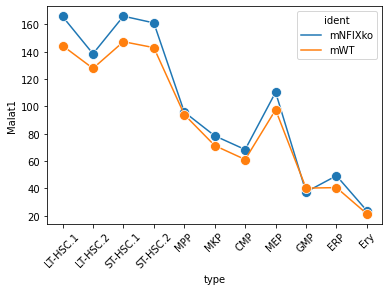

In [139]:
plot_a_gene(df,"Malat1")

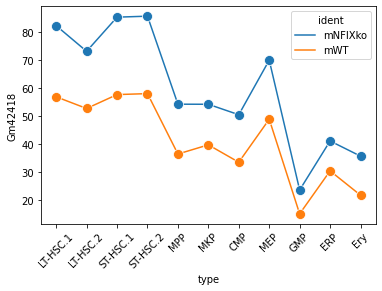

In [140]:
plot_a_gene(df,"Gm42418")

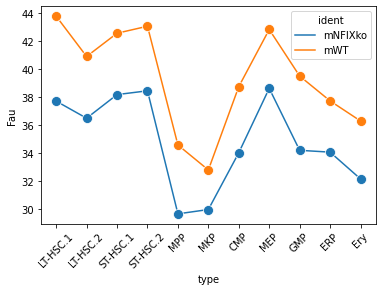

In [ ]:
plot_a_gene(df,"Fau")

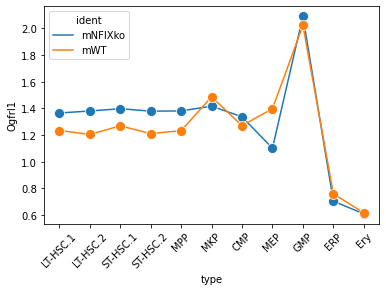

In [150]:
plot_a_gene(df,"Ogfrl1")

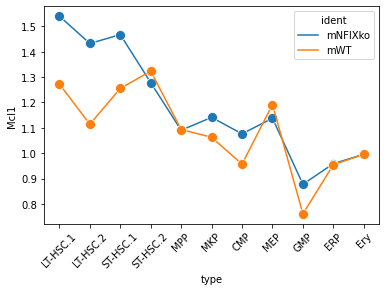

In [242]:
plot_a_gene(df,"Mcl1")
plt.savefig("Mcl1.pdf",bbox_inches='tight')


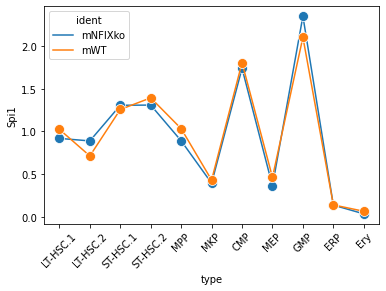

In [241]:
plot_a_gene(df,"Spi1")

In [25]:
a=pd.DataFrame(df.loc['Cd74']).reset_index()

In [26]:
a.head()

,index,Cd74
0,Ery_mNFIXko,0.016071
1,Ery_mWT,0.020465
2,CMP_mNFIXko,1.294062
3,CMP_mWT,1.303754
4,ST-HSC.1_mNFIXko,2.962269


In [27]:
a[['type', 'ident']] = a['index'].str.split('_', 1, expand=True)

In [17]:
a

,index,Cd74,type,ident
0,Ery_mNFIXko,0.016071,Ery,mNFIXko
1,Ery_mWT,0.020465,Ery,mWT
2,CMP_mNFIXko,1.294062,CMP,mNFIXko
3,CMP_mWT,1.303754,CMP,mWT
4,ST-HSC.1_mNFIXko,2.962269,ST-HSC.1,mNFIXko
5,ST-HSC.1_mWT,2.397862,ST-HSC.1,mWT
6,LT-HSC.1_mNFIXko,3.085193,LT-HSC.1,mNFIXko
7,LT-HSC.1_mWT,2.603334,LT-HSC.1,mWT
8,GMP_mNFIXko,0.025808,GMP,mNFIXko
9,GMP_mWT,0.063497,GMP,mWT


In [18]:
import seaborn as sns

In [29]:
?sns.lineplot

Signature:
sns.lineplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and 

<AxesSubplot:xlabel='type', ylabel='Cd74'>

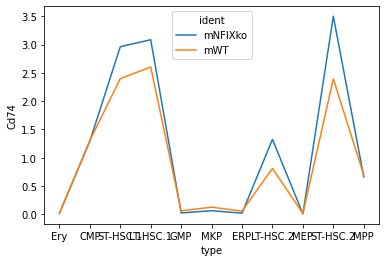

In [31]:
sns.lineplot(data=a,x="type",hue="ident",y="Cd74")

[Text(0, 0, 'LT-HSC.1'),
 Text(1, 0, 'LT-HSC.2'),
 Text(2, 0, 'ST-HSC.1'),
 Text(3, 0, 'ST-HSC.2'),
 Text(4, 0, 'MPP'),
 Text(5, 0, 'MKP'),
 Text(6, 0, 'CMP'),
 Text(7, 0, 'MEP'),
 Text(8, 0, 'GMP'),
 Text(9, 0, 'ERP'),
 Text(10, 0, 'Ery')]

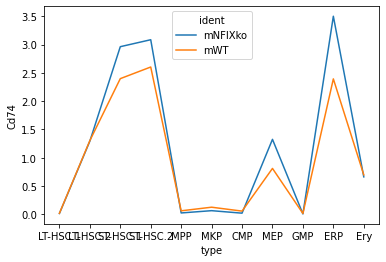

In [30]:
ax=sns.lineplot(data=a,x="type",hue="ident",y="Cd74")
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order)

In [20]:
order = ["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]

/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


<AxesSubplot:xlabel='type', ylabel='Cd74'>

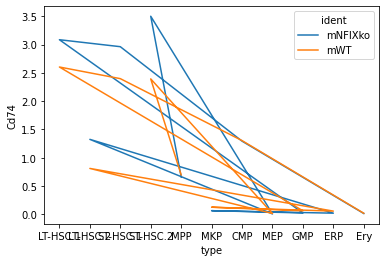

In [24]:
a['type'] = a['type'].astype("category")
a['type'].cat.set_categories(order, inplace=True)
sns.lineplot(data=a,x="type",hue="ident",y="Cd74",sort=False)

In [33]:
b=a.copy()

In [35]:
b['type'] = pd.Categorical(b['type'],
                                   categories=order,
                                   ordered=True)

In [40]:
?sns.lineplot

Signature:
sns.lineplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and 

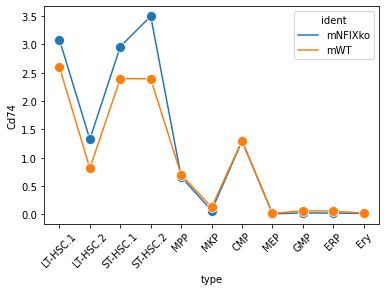

In [46]:
import matplotlib.pyplot as plt

sns.lineplot(data=b,x="type",hue="ident",y="Cd74",marker=".", markersize=20)
# sns.scatterplot(data=b,x="type",hue="ident", size = 10)
plt.xticks(rotation = 45)
plt.savefig("Cd74.pdf",bbox_inches='tight')


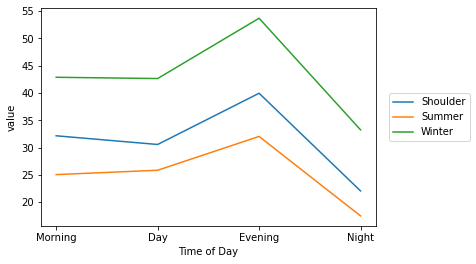

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Time of Day': ['Day', 'Day', 'Day', 'Evening', 'Evening', 'Evening', 'Morning', 'Morning', 'Morning', 'Night', 'Night', 'Night'],
        'Season': ['Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter', 'Shoulder', 'Summer', 'Winter'],
        'value': [30.581606, 25.865560000000002, 42.644529999999996, 39.954759, 32.053458, 53.678297, 32.171245, 25.070815, 42.876667, 22.082042, 17.510289999999998, 33.262356]}

# create dataframe
df = pd.DataFrame(data)

# set categorical order
df['Time of Day'] = pd.Categorical(df['Time of Day'],
                                   categories=['Morning', 'Day', 'Evening', 'Night'],
                                   ordered=True)

# plot
g = sns.lineplot(x='Time of Day', y='value', data=df, hue='Season')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

# check Rpl Rps genes

In [89]:
df.head()

,Ery_mNFIXko,Ery_mWT,CMP_mNFIXko,CMP_mWT,ST-HSC.1_mNFIXko,ST-HSC.1_mWT,LT-HSC.1_mNFIXko,LT-HSC.1_mWT,GMP_mNFIXko,GMP_mWT,...,ERP_mNFIXko,ERP_mWT,LT-HSC.2_mNFIXko,LT-HSC.2_mWT,MEP_mNFIXko,MEP_mWT,ST-HSC.2_mNFIXko,ST-HSC.2_mWT,MPP_mNFIXko,MPP_mWT
Xkr4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.005663,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
df[df.index.str.contains("Rpl")]

,Ery_mNFIXko,Ery_mWT,CMP_mNFIXko,CMP_mWT,ST-HSC.1_mNFIXko,ST-HSC.1_mWT,LT-HSC.1_mNFIXko,LT-HSC.1_mWT,GMP_mNFIXko,GMP_mWT,...,ERP_mWT,LT-HSC.2_mNFIXko,LT-HSC.2_mWT,MEP_mNFIXko,MEP_mWT,ST-HSC.2_mNFIXko,ST-HSC.2_mWT,MPP_mNFIXko,MPP_mWT,mean
Rpl7,36.099668,35.518701,35.193416,33.558566,36.919107,36.379067,40.314206,41.301512,32.486327,31.380298,...,37.868498,41.630007,40.894022,38.758216,36.570404,38.648102,37.125673,33.446204,31.887852,36.497917
Rpl31,13.153130,14.245068,10.405007,11.635874,9.248955,10.667870,10.024706,11.619676,11.182824,12.468633,...,14.184740,10.384639,11.292590,10.663484,12.047350,9.665545,10.273173,10.213267,10.630700,11.300340
Rpl37a,28.142362,31.139376,26.726438,30.455079,31.838113,37.133001,33.777120,40.384215,24.988249,29.492580,...,35.825023,33.764911,37.767780,34.047229,37.537254,31.845277,37.030628,26.653752,30.220461,32.208712
Rpl7a,22.284727,22.456273,19.011132,18.806297,17.033040,16.834126,17.148330,17.224665,19.121354,18.242100,...,19.985009,17.338247,16.976006,18.235304,17.510041,17.562766,17.385602,15.979728,16.243194,18.144239
Rpl12,51.710459,49.968452,50.429176,49.114477,52.661665,51.149488,54.633131,54.212388,48.132161,47.156537,...,57.105595,53.673184,53.244966,66.392624,60.383400,53.201698,51.777386,43.836219,42.904707,52.242875
Rpl35,15.782538,15.471593,14.088809,14.358816,12.608867,13.751192,12.649849,13.659156,12.990982,13.645275,...,17.058285,13.439194,14.792735,15.959321,16.282890,12.876910,13.600253,13.036442,13.019331,14.263595
Rpl39,20.354318,23.950820,28.007759,32.918750,29.348189,34.448410,28.895332,34.521887,23.977837,29.286862,...,29.536117,29.517084,35.283336,31.685196,37.106974,29.726418,34.872610,25.294304,30.285822,29.838726
Rpl10,28.789208,27.241531,34.401215,31.972929,36.216865,33.977418,35.932329,34.477434,34.209446,31.769217,...,27.952006,35.182161,31.070515,36.160917,31.784247,36.745184,33.318428,26.575079,24.003889,31.522869
Rpl36a,13.391379,14.405736,13.173643,14.393364,14.875105,17.073439,15.841900,18.027894,13.155165,14.645923,...,16.142362,16.080041,17.358995,14.883999,15.990437,15.319169,16.981538,13.016333,14.232400,15.039909
Rpl22l1,7.751802,8.874299,8.200813,9.423729,7.375881,9.032925,7.526315,9.673102,8.558858,9.737132,...,9.917800,8.247244,10.761057,7.068375,8.842059,7.256810,9.545182,8.705553,10.982940,8.785024


In [54]:
all_deg = pd.read_csv("all_degs.tsv",sep="\t")

In [52]:
all_deg.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
1,5.756060e-81,0.847197,0.346,0.005,1.787429e-76,6.907272e-79,LT-HSC.1,Trim12a,76681.0,UP,LT-HSC.1
2,5.791799e-64,-1.119813,0.008,0.442,1.798527e-59,3.475079e-62,LT-HSC.1,Echdc2,52430.0,DN,LT-HSC.1
3,8.276152e-55,0.526138,1.000,1.000,2.569993e-50,3.310461e-53,LT-HSC.1,Gm42418,NaN,UP,LT-HSC.1
4,6.953850e-24,0.303368,0.152,0.017,2.159379e-19,5.563080e-23,LT-HSC.1,Trim34a,94094.0,UP,LT-HSC.1
5,3.123158e-16,0.323639,0.273,0.100,9.698343e-12,1.561579e-15,LT-HSC.1,Wdfy1,69368.0,UP,LT-HSC.1


In [120]:
all_deg[all_deg.geneName.str.contains("Cd74")]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
102,0.000399,0.35985,0.368,0.237,1.0,0.00072,LT-HSC.2,Cd74,16149.0,UP,LT-HSC.2


In [58]:
deg_rp =all_deg[all_deg.geneName.str.contains("Rps|Rpl")].geneName.tolist()

In [59]:
df.head()

,Ery_mNFIXko,Ery_mWT,CMP_mNFIXko,CMP_mWT,ST-HSC.1_mNFIXko,ST-HSC.1_mWT,LT-HSC.1_mNFIXko,LT-HSC.1_mWT,GMP_mNFIXko,GMP_mWT,...,ERP_mNFIXko,ERP_mWT,LT-HSC.2_mNFIXko,LT-HSC.2_mWT,MEP_mNFIXko,MEP_mWT,ST-HSC.2_mNFIXko,ST-HSC.2_mWT,MPP_mNFIXko,MPP_mWT
Xkr4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.005663,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
rp = df[df.index.str.contains("Rpl|Rps")]
rp = rp[~rp.index.isin(deg_rp)]

In [102]:
rp.shape

(90, 22)

In [64]:
rp.head()

,Ery_mNFIXko,Ery_mWT,CMP_mNFIXko,CMP_mWT,ST-HSC.1_mNFIXko,ST-HSC.1_mWT,LT-HSC.1_mNFIXko,LT-HSC.1_mWT,GMP_mNFIXko,GMP_mWT,...,ERP_mNFIXko,ERP_mWT,LT-HSC.2_mNFIXko,LT-HSC.2_mWT,MEP_mNFIXko,MEP_mWT,ST-HSC.2_mNFIXko,ST-HSC.2_mWT,MPP_mNFIXko,MPP_mWT
Rpl7,36.099668,35.518701,35.193416,33.558566,36.919107,36.379067,40.314206,41.301512,32.486327,31.380298,...,39.453443,37.868498,41.630007,40.894022,38.758216,36.570404,38.648102,37.125673,33.446204,31.887852
Rpl31,13.153130,14.245068,10.405007,11.635874,9.248955,10.667870,10.024706,11.619676,11.182824,12.468633,...,12.589200,14.184740,10.384639,11.292590,10.663484,12.047350,9.665545,10.273173,10.213267,10.630700
Rps6kc1,0.083070,0.074049,0.058789,0.048880,0.063211,0.078498,0.079968,0.070081,0.032916,0.024873,...,0.086412,0.088450,0.068059,0.068154,0.064923,0.082498,0.076663,0.096188,0.099943,0.054697
Rpl7a,22.284727,22.456273,19.011132,18.806297,17.033040,16.834126,17.148330,17.224665,19.121354,18.242100,...,20.050604,19.985009,17.338247,16.976006,18.235304,17.510041,17.562766,17.385602,15.979728,16.243194
Rpl12,51.710459,49.968452,50.429176,49.114477,52.661665,51.149488,54.633131,54.212388,48.132161,47.156537,...,58.798125,57.105595,53.673184,53.244966,66.392624,60.383400,53.201698,51.777386,43.836219,42.904707


In [66]:
len(deg_rp)

39

In [67]:
mm_genes = pd.read_csv("/home/yli11/Data/Mouse/mm9/annotations/mm10_mm9.93.filtered.TSS.bed",sep="\t",header=None)

In [68]:
mm_genes.head()

,0,1,2,3,4,5
0,chr1,3661578,3661579,Xkr4,.,-
1,chr1,3456668,3456669,Gm1992,.,+
2,chr1,3976295,3976296,Gm37381,.,-
3,chr1,4399321,4399322,Rp1,.,-
4,chr1,4487434,4487435,Sox17,.,-


In [103]:
background = mm_genes[mm_genes[3].isin(rp.index)]

In [104]:
background.shape

(90, 6)

In [75]:
deg_genes = mm_genes[mm_genes[3].isin(deg_rp)]

In [76]:
deg_genes.shape

(15, 6)

In [83]:
len(set(deg_rp))

15

In [80]:
set(deg_rp)-set(mm_genes[3])

set()

In [86]:
deg_genes.to_csv("deg_rp.bed",sep="\t",header=False,index=False)

In [105]:
background.to_csv("background_rp.bed",sep="\t",header=False,index=False)

# figure 6

In [245]:
df = pd.read_csv("GO_enrichment.all_DEG.csv")
df = df[df.GO_database=="BP"]
df.head()

,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GO_database,geneName
0,CMP,CMP,GO:0002181,cytoplasmic translation,4:47,91:23328,0.000034,0.011202,0.008726,57808/20090/67248/54127,4,BP,Rpl35a/Rps29/Rpl39/Rps28
1,CMP,CMP,GO:0042742,defense response to bacterium,7:47,464:23328,0.000037,0.011202,0.008726,67248/14972/16819/17523/13035/50701/20568,7,BP,Rpl39/H2-K1/Lcn2/Mpo/Ctsg/Elane/Slpi
2,CMP,CMP,GO:0050832,defense response to fungus,3:47,35:23328,0.000048,0.011202,0.008726,17523/13035/50701,3,BP,Mpo/Ctsg/Elane
3,CMP,CMP,GO:0019731,antibacterial humoral response,4:47,104:23328,0.000057,0.011202,0.008726,67248/13035/50701/20568,4,BP,Rpl39/Ctsg/Elane/Slpi
4,CMP,CMP,GO:0044403,symbiotic process,6:47,374:23328,0.000101,0.015708,0.012237,76681/16852/16476/13035/50701/20568,6,BP,Trim12a/Lgals1/Jun/Ctsg/Elane/Slpi


,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GO_database,geneName
0,CMP,CMP,GO:0002181,cytoplasmic translation,4:47,91:23328,3.399105e-05,1.120158e-02,8.726344e-03,57808/20090/67248/54127,4,BP,Rpl35a/Rps29/Rpl39/Rps28
82,CMP,CMP,GO:0046034,ATP metabolic process,3:47,253:23328,1.438930e-02,1.353981e-01,1.054789e-01,67126/11983/12866,3,BP,Atp5e/Atpif1/Cox7a2
177,CMP,CMP,GO:0000028,ribosomal small subunit assembly,1:47,21:23328,4.148545e-02,1.790063e-01,1.394509e-01,54127,1,BP,Rps28
189,CMP,CMP,GO:0022618,ribonucleoprotein complex assembly,2:47,172:23328,4.706112e-02,1.880285e-01,1.464795e-01,54127/69878,2,BP,Rps28/Snrpf
202,CMP,CMP,GO:0022613,ribonucleoprotein complex biogenesis,3:47,409:23328,4.920711e-02,1.880285e-01,1.464795e-01,57808/54127/69878,3,BP,Rpl35a/Rps28/Snrpf
261,ERP,ERP,GO:0046034,ATP metabolic process,12:63,253:23328,3.335092e-12,4.539060e-09,3.763388e-09,67126/22272/27425/67267/66152/12867/12859/5742...,12,BP,Atp5e/Uqcrq/Atp5l/Uqcc2/Uqcr10/Cox7c/Cox5b/Atp...
262,ERP,ERP,GO:0006119,oxidative phosphorylation,9:63,108:23328,1.337348e-11,9.100656e-09,7.545461e-09,22272/27425/67267/66152/12867/12859/57423/6753...,9,BP,Uqcrq/Atp5l/Uqcc2/Uqcr10/Cox7c/Cox5b/Atp5j2/Uq...
471,Ery,Ery,GO:0002181,cytoplasmic translation,2:34,91:23328,7.785270e-03,1.194260e-01,8.932573e-02,57808/67248,2,BP,Rpl35a/Rpl39
646,Ery,Ery,GO:0046034,ATP metabolic process,2:34,253:23328,5.236851e-02,1.738905e-01,1.300629e-01,57423/12257,2,BP,Atp5j2/Tspo
743,GMP,GMP,GO:0002181,cytoplasmic translation,6:41,91:23328,1.200924e-08,3.490687e-06,2.502979e-06,67248/20090/57808/54127/67671/27370,6,BP,Rpl39/Rps29/Rpl35a/Rps28/Rpl38/Rps26


In [261]:
go = pd.read_csv("GO.list",header=None)[0].tolist()
top3 = []
for s,d in df.groupby("Cluster"):
    d = d.sort_values('qvalue')
    top3 += d.head(n=3).ID.tolist()
print (top3+go)
all = df[df.ID.isin(top3+go)]

['GO:0002181', 'GO:0042742', 'GO:0050832', 'GO:0046034', 'GO:0006119', 'GO:0015985', 'GO:0010043', 'GO:0046686', 'GO:0050832', 'GO:0035966', 'GO:0006986', 'GO:0002181', 'GO:0002181', 'GO:0019882', 'GO:0048002', 'GO:0002181', 'GO:0048002', 'GO:0019882', 'GO:0051568', 'GO:0045785', 'GO:2001138', 'GO:0044403', 'GO:0050792', 'GO:0043903', 'GO:0006281', 'GO:0034502', 'GO:0022613', 'GO:0048002', 'GO:0019882', 'GO:0035456', 'GO:0019882', 'GO:0048002', 'GO:0002181', 'GO:0002181', 'GO:0046034', 'GO:0000028', 'GO:0022613', 'GO:0006119', 'GO:0022618', 'GO:0002181', 'GO:0008630', 'GO:0045639', 'GO:0045652']


In [267]:
all['logFDR'] = [-np.log10(x) for x in all.qvalue]
all['enrichment'] = [eval(x.replace(":","/")) for x in all.GeneRatio]

/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [268]:
all.head()

,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GO_database,geneName,logFDR,enrichment
0,CMP,CMP,GO:0002181,cytoplasmic translation,4:47,91:23328,0.000034,0.011202,0.008726,57808/20090/67248/54127,4,BP,Rpl35a/Rps29/Rpl39/Rps28,2.059168,0.085106
1,CMP,CMP,GO:0042742,defense response to bacterium,7:47,464:23328,0.000037,0.011202,0.008726,67248/14972/16819/17523/13035/50701/20568,7,BP,Rpl39/H2-K1/Lcn2/Mpo/Ctsg/Elane/Slpi,2.059168,0.148936
2,CMP,CMP,GO:0050832,defense response to fungus,3:47,35:23328,0.000048,0.011202,0.008726,17523/13035/50701,3,BP,Mpo/Ctsg/Elane,2.059168,0.063830
4,CMP,CMP,GO:0044403,symbiotic process,6:47,374:23328,0.000101,0.015708,0.012237,76681/16852/16476/13035/50701/20568,6,BP,Trim12a/Lgals1/Jun/Ctsg/Elane/Slpi,1.912327,0.127660
13,CMP,CMP,GO:0050792,regulation of viral process,4:47,201:23328,0.000714,0.038810,0.030234,76681/16852/16476/20568,4,BP,Trim12a/Lgals1/Jun/Slpi,1.519502,0.085106


In [278]:
all = all[all.Description!="symbiotic process"]
all = all[all.Description!="regulation of symbiotic process"]
all[['Description','logFDR','enrichment','Cluster']].to_csv("enrichment_dotplot.tsv",sep="\t",index=False)

In [276]:
all[all.Description.str.contains("symbiotic")]

,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GO_database,geneName,logFDR,enrichment
18,CMP,CMP,GO:0043903,regulation of symbiotic process,4:47,218:23328,9.659450e-04,0.039705,0.030932,76681/16852/16476/20568,4,BP,Trim12a/Lgals1/Jun/Slpi,1.509597,0.085106
418,ERP,ERP,GO:0043903,regulation of symbiotic process,3:63,218:23328,2.119921e-02,0.182608,0.151403,76681/16852/69550,3,BP,Trim12a/Lgals1/Bst2,0.819866,0.047619
1041,GMP,GMP,GO:0043903,regulation of symbiotic process,2:41,218:23328,5.618524e-02,0.161879,0.116074,76681/16852,2,BP,Trim12a/Lgals1,0.935263,0.048780
1201,LT-HSC.1,LT-HSC,GO:0043903,regulation of symbiotic process,5:110,218:23328,3.766677e-03,0.096864,0.085115,76681/94094/11816/16852/20846,5,BP,Trim12a/Trim34a/Apoe/Lgals1/Stat1,1.069991,0.045455
1352,LT-HSC.2,LT-HSC,GO:0043903,regulation of symbiotic process,9:123,218:23328,2.412970e-06,0.000179,0.000152,76681/94094/80287/384309/16149/16852/13194/208...,9,BP,Trim12a/Trim34a/Apobec3/Trim56/Cd74/Lgals1/Ddb...,3.817254,0.073171
1730,MEP,MEP,GO:0043903,regulation of symbiotic process,6:112,218:23328,6.530380e-04,0.038672,0.030949,16852/76681/94094/13830/21974/16476,6,BP,Lgals1/Trim12a/Trim34a/Stom/Top2b/Jun,1.509355,0.053571
2197,MKP,MKP,GO:0043903,regulation of symbiotic process,6:50,218:23328,7.009822e-06,0.002675,0.002137,76681/16852/12043/16476/69550/21973,6,BP,Trim12a/Lgals1/Bcl2/Jun/Bst2/Top2a,2.670118,0.120000
2503,MPP,MPP,GO:0043903,regulation of symbiotic process,6:121,218:23328,9.788462e-04,0.037422,0.032040,76681/94094/12043/72462/66949/16852,6,BP,Trim12a/Trim34a/Bcl2/Rrp1b/Trim59/Lgals1,1.494302,0.049587
2735,ST-HSC.1,ST-HSC,GO:0043903,regulation of symbiotic process,9:86,218:23328,1.136245e-07,0.000010,0.000008,76681/667823/94094/22695/16476/69550/16852/208...,9,BP,Trim12a/Trim5/Trim34a/Zfp36/Jun/Bst2/Lgals1/St...,5.091893,0.104651
3196,ST-HSC.2,ST-HSC,GO:0043903,regulation of symbiotic process,7:106,218:23328,6.293751e-05,0.005975,0.005399,76681/94094/18673/22695/16476/16852/20846,7,BP,Trim12a/Trim34a/Phb/Zfp36/Jun/Lgals1/Stat1,2.267656,0.066038


In [277]:
all[all.Description.str.contains("viral process")]

,Cluster,myCluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,GO_database,geneName,logFDR,enrichment
13,CMP,CMP,GO:0050792,regulation of viral process,4:47,201:23328,7.140374e-04,0.038810,0.030234,76681/16852/16476/20568,4,BP,Trim12a/Lgals1/Jun/Slpi,1.519502,0.085106
408,ERP,ERP,GO:0050792,regulation of viral process,3:63,201:23328,1.713899e-02,0.157609,0.130676,76681/16852/69550,3,BP,Trim12a/Lgals1/Bst2,0.883805,0.047619
1012,GMP,GMP,GO:0050792,regulation of viral process,2:41,201:23328,4.863783e-02,0.155927,0.111807,76681/16852,2,BP,Trim12a/Lgals1,0.951532,0.048780
1190,LT-HSC.1,LT-HSC,GO:0050792,regulation of viral process,5:110,201:23328,2.662166e-03,0.080561,0.070790,76681/94094/11816/16852/20846,5,BP,Trim12a/Trim34a/Apoe/Lgals1/Stat1,1.150029,0.045455
1348,LT-HSC.2,LT-HSC,GO:0050792,regulation of viral process,9:123,201:23328,1.234431e-06,0.000105,0.000089,76681/94094/80287/384309/16149/16852/13194/208...,9,BP,Trim12a/Trim34a/Apobec3/Trim56/Cd74/Lgals1/Ddb...,4.048341,0.073171
1720,MEP,MEP,GO:0050792,regulation of viral process,6:112,201:23328,4.259107e-04,0.034809,0.027858,16852/76681/94094/13830/21974/16476,6,BP,Lgals1/Trim12a/Trim34a/Stom/Top2b/Jun,1.555051,0.053571
2196,MKP,MKP,GO:0050792,regulation of viral process,6:50,201:23328,4.400745e-06,0.002519,0.002013,76681/16852/12043/16476/69550/21973,6,BP,Trim12a/Lgals1/Bcl2/Jun/Bst2/Top2a,2.696208,0.120000
2496,MPP,MPP,GO:0050792,regulation of viral process,6:121,201:23328,6.419012e-04,0.028358,0.024280,76681/94094/12043/72462/66949/16852,6,BP,Trim12a/Trim34a/Bcl2/Rrp1b/Trim59/Lgals1,1.614758,0.049587
2731,ST-HSC.1,ST-HSC,GO:0050792,regulation of viral process,9:86,201:23328,5.674108e-08,0.000007,0.000005,76681/667823/94094/22695/16476/69550/16852/208...,9,BP,Trim12a/Trim5/Trim34a/Zfp36/Jun/Bst2/Lgals1/St...,5.272937,0.104651
3192,ST-HSC.2,ST-HSC,GO:0050792,regulation of viral process,7:106,201:23328,3.765329e-05,0.004766,0.004307,76681/94094/18673/22695/16476/16852/20846,7,BP,Trim12a/Trim34a/Phb/Zfp36/Jun/Lgals1/Stat1,2.365824,0.066038


In [271]:
all.Cluster.unique()

array(['CMP', 'ERP', 'Ery', 'GMP', 'LT-HSC.1', 'LT-HSC.2', 'MEP', 'MKP',
       'MPP', 'ST-HSC.1', 'ST-HSC.2'], dtype=object)

In [274]:
%%R

library(ggplot2)
library(DOSE)
df = read.table("enrichment_dotplot.tsv",header=TRUE,sep="\t")
head(df)

level = c("LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
## specifying Y-axis order
orderBy="logFDR"
idx <- order(df[[orderBy]], decreasing = T)
df$Description <- factor(df$Description,levels=rev(unique(df$Description[idx])))

## specifying X-axis order
df$Cluster <- factor(df$Cluster, levels=level)

## main plot fuction
ggplot(df, aes_string(x="Cluster", y="Description", size="enrichment", color="logFDR")) +
        geom_point() + scale_size_continuous(range = c(1, 5))+
        scale_color_continuous(low="blue", high="red", name = "logFDR",
                guide=guide_colorbar(reverse=F)) +ylab(NULL)+theme_dose(10)

## save file, width and height is important,useDingbats=FALSE, compatible with illustrator
ggsave("test.pdf",width=7,heigh=4,useDingbats=FALSE)

UsageError: Cell magic `%%R` not found.


# plot avgolgFC heatmap

In [6]:
import glob

In [7]:
files = glob.glob("*DEG.all.for_heatmap.tsv")

In [11]:
files

['ClusterMPP.DEG.all.for_heatmap.tsv',
 'ClusterST-HSC.1.DEG.all.for_heatmap.tsv',
 'ClusterEry.DEG.all.for_heatmap.tsv',
 'ClusterMEP.DEG.all.for_heatmap.tsv',
 'ClusterMKP.DEG.all.for_heatmap.tsv',
 'ClusterLT-HSC.2.DEG.all.for_heatmap.tsv',
 'ClusterLT-HSC.1.DEG.all.for_heatmap.tsv',
 'ClusterERP.DEG.all.for_heatmap.tsv',
 'ClusterGMP.DEG.all.for_heatmap.tsv',
 'ClusterST-HSC.2.DEG.all.for_heatmap.tsv',
 'ClusterCMP.DEG.all.for_heatmap.tsv']

In [8]:
df = pd.read_csv(files[0],sep="\t")
df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
Trim12a,2.951857e-24,0.521736,0.422,0.016,9.166401e-20
Echdc2,1.623388e-21,-0.831476,0.037,0.525,5.041105e-17
Gm42418,4.108637e-19,0.562806,1.000,1.000,1.275855e-14
Rpl23,6.470292e-13,-0.208768,1.000,1.000,2.009220e-08
Rpl39,8.734386e-12,-0.250759,1.000,1.000,2.712289e-07


In [23]:
def parse_df2(f):
    df = pd.read_csv(f,sep="\t")
    df=df[['p_val_adj']]
    # df.columns =[f.replace(".DEG.all.for_heatmap.tsv","").replace("Cluster","")]
    df = df.reset_index()
    return df
df_list = [parse_df2(f) for f in files]
df2 = pd.concat(df_list)
df2 = df2.sort_values("p_val_adj")
df2 = df2.drop_duplicates("index")

In [24]:
df2.head()

,index,p_val_adj
0,Gm42418,5.122583e-134
1,Gm47283,3.075090e-101
2,Rpl35a,6.902538e-91
0,Echdc2,7.619096e-89
3,Alad,6.599796e-83


In [9]:
def parse_df(f):
    df = pd.read_csv(f,sep="\t")
    df=df[['avg_log2FC']]
    df.columns =[f.replace(".DEG.all.for_heatmap.tsv","").replace("Cluster","")]
    return df

In [10]:
df_list = [parse_df(f) for f in files]
df = pd.concat(df_list,axis=1)

In [25]:
df.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Trim12a,0.847197,0.660440,0.747470,0.642353,0.521736,0.294112,0.405101,0.435322,0.257544,0.274388,0.126408
Echdc2,-1.119813,-1.103615,-1.141771,-1.047393,-0.831476,-0.695539,-0.629195,-0.942100,-0.219729,-0.384723,-0.144447
Gm42418,0.526138,0.465903,0.558219,0.555547,0.562806,0.440276,0.578867,0.510114,0.618120,0.423677,0.693750
Rpl23,-0.196030,-0.164429,-0.146396,-0.169173,-0.208768,-0.082555,-0.166394,-0.088339,-0.205952,-0.111546,-0.141427
Rpl39,-0.248788,-0.249690,-0.224110,-0.223403,-0.250759,-0.192671,-0.225644,-0.221418,-0.278044,-0.174880,-0.224559


In [41]:
df.to_csv("all_DEG.avg_logFC.csv")

In [26]:
df = df[["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]]

In [39]:
df.head()

,LT-HSC.1,LT-HSC.2,ST-HSC.1,ST-HSC.2,MPP,MKP,CMP,MEP,GMP,ERP,Ery
Trim12a,0.847197,0.660440,0.747470,0.642353,0.521736,0.294112,0.405101,0.435322,0.257544,0.274388,0.126408
Echdc2,-1.119813,-1.103615,-1.141771,-1.047393,-0.831476,-0.695539,-0.629195,-0.942100,-0.219729,-0.384723,-0.144447
Gm42418,0.526138,0.465903,0.558219,0.555547,0.562806,0.440276,0.578867,0.510114,0.618120,0.423677,0.693750
Rpl23,-0.196030,-0.164429,-0.146396,-0.169173,-0.208768,-0.082555,-0.166394,-0.088339,-0.205952,-0.111546,-0.141427
Rpl39,-0.248788,-0.249690,-0.224110,-0.223403,-0.250759,-0.192671,-0.225644,-0.221418,-0.278044,-0.174880,-0.224559


In [40]:
df.shape

(530, 11)

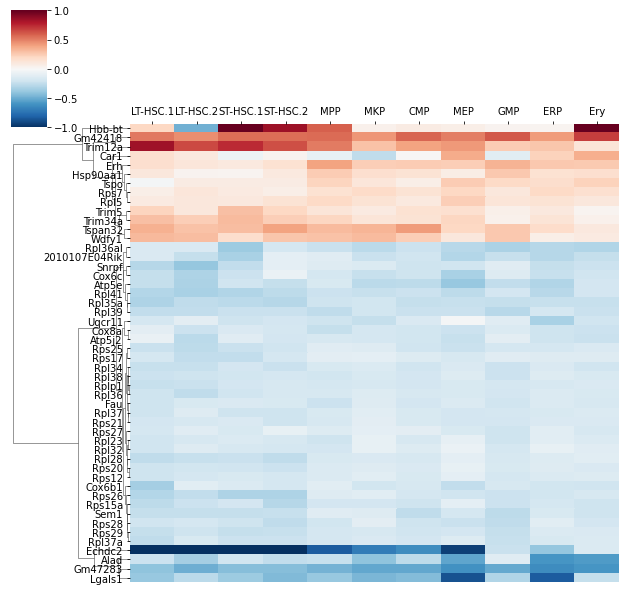

In [38]:
# top 50 genes
g=sns.clustermap(df.loc[df2.head(n=50)['index']],vmin=-1,vmax=1,cmap="RdBu_r",metric="euclidean",method="ward",col_cluster=False,figsize=(10,9),yticklabels=True)
ax = g.ax_heatmap
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.savefig("DEG_heatmap.top50.pdf",bbox_inches='tight')

In [ ]:
out.columns = ["LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery"]

In [1]:
# fig, ax = plt.subplots(1, 1)
# cbar_ax = fig.add_axes([.905, .3, .05, .3])
# sns.heatmap(arr, ax=ax, cbar_ax = cbar_ax, cbar=True)
sns.clustermap(df,vmin=-1,vmax=1,cmap="RdBu_r",metric="euclidean",method="ward",col_cluster=False,figsize=(10,80),yticklabels=True)
plt.savefig("DEG_heatmap.all.pdf",bbox_inches='tight')
# cbnorm = Normalize(vmin=0-0.5,vmax=5+0.5,clip=False) #setting the scale
# cb = plt.colorbar(cm.ScalarMappable(norm=cbnorm, cmap=newcmp),fraction=1,ax=ax_color,ticks=np.arange(6))

NameError: name 'sns' is not defined